In [7]:
from stockai.llm import LLM

llm = LLM('embedding')

llm.get_embeddings().embed_query("你好")



[-0.007786486,
 0.0030635218,
 0.048999373,
 -0.01888824,
 -0.035900466,
 0.015862327,
 -0.01067077,
 0.0041407053,
 -0.00090730225,
 0.021380873,
 0.07677743,
 0.016190486,
 0.02762464,
 -0.014990083,
 -0.043697175,
 -0.00022716483,
 -0.0028992645,
 -0.040561415,
 -0.021718135,
 -0.03863862,
 -0.008903424,
 -0.023674773,
 -0.054912,
 -0.034821577,
 0.025135666,
 0.03655958,
 0.028641539,
 0.00016932108,
 0.025531072,
 0.04018289,
 -0.022235371,
 -0.04130813,
 0.030629976,
 -0.016588442,
 -0.028407967,
 -0.0050124764,
 0.018585792,
 -0.020895297,
 -0.035891443,
 -0.060278647,
 0.04564358,
 -0.022089215,
 0.082795314,
 -0.00743427,
 0.035391152,
 -0.018704215,
 -0.049329944,
 -0.01379917,
 0.030861447,
 -0.032388702,
 -0.0067101168,
 -0.048089013,
 0.064865164,
 0.02483853,
 0.014289522,
 -0.0107837645,
 0.007322614,
 -0.026721241,
 0.0043201107,
 0.067896225,
 0.02485328,
 -0.0123031065,
 0.023151526,
 -0.012036504,
 0.05569106,
 0.019995807,
 0.01446923,
 0.023831705,
 0.025877452,
 -

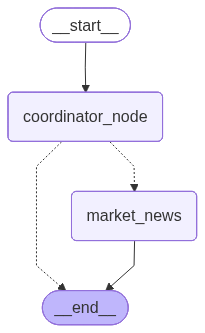

In [2]:
from langchain_core.messages import HumanMessage
from stockai.agent import graph
from IPython.display import Image, display


display(Image(graph.get_graph(xray = True).draw_mermaid_png()))

# for chunk in graph.stream({'user_input': HumanMessage(content = '今天的大盘如何')}, stream_mode = 'updates'):
#     if 'tools' in chunk.keys():
#         chunk['tools']['messages'][0].pretty_print()
#     elif 'agent' in chunk.keys():
#         chunk['agent']['messages'][0].pretty_print()
#     else:
#         print(chunk)

In [1]:
from stockai.subagents.market import get_proper_concept

result = get_proper_concept({'user_input' : '今天涨幅前3的板块是哪些'})

INFO:stockai.llm:使用 DeepSeek Chat 模型: deepseek-chat
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:stockai.tools.akshare.client:调用AKShare API: stock_board_concept_name_em params={'args': (), 'kwargs': {}}


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:stockai.tools.akshare.client:API调用成功: stock_board_concept_name_em, 耗时: 1459.5ms
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [3]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

今天涨幅前3的板块是哪些
================================== Ai Message ==================================

我来为您查询今天涨幅前3的板块。
Tool Calls:
  get_concept_realtime_data (call_00_z9C5UHNZ7M5aEcts2THlGUEV)
 Call ID: call_00_z9C5UHNZ7M5aEcts2THlGUEV
  Args:
    top_n: 3
    format: dict
================================= Tool Message =================================
Name: get_concept_realtime_data

[{"板块名称": "赛马概念", "板块代码": "BK0709", "最新价": 835.3, "涨跌额": 39.54, "涨跌幅": 4.97, "换手率": 6.7, "上涨家数": 3, "下跌家数": 0}, {"板块名称": "快手概念", "板块代码": "BK0972", "最新价": 1681.64, "涨跌额": 40.94, "涨跌幅": 2.5, "换手率": 9.27, "上涨家数": 22, "下跌家数": 6}, {"板块名称": "影视概念", "板块代码": "BK0847", "最新价": 1079.23, "涨跌额": 23.68, "涨跌幅": 2.24, "换手率": 5.72, "上涨家数": 55, "下跌家数": 8}]
================================== Ai Message ==================================

根据实时数据，今天涨幅前3的板块是：

1. **赛马概念 (BK0709)** - 涨幅：4.97%
   - 最新价：835.3
   - 上涨家数：3家，下跌家数：0家
   - 换手率：6.7%

2. **快手概念 

In [2]:
from stockai.llm import LLM
LLM('reason').get_model()

ChatDeepSeek(client=<openai.resources.chat.completions.completions.Completions object at 0x11c4aad50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x11c435910>, root_client=<openai.OpenAI object at 0x11bd5ff20>, root_async_client=<openai.AsyncOpenAI object at 0x11c4ab740>, model_name='deepseek-reasoner', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://api.deepseek.com', api_key=SecretStr('**********'), api_base='https://api.deepseek.com/v1')

In [13]:
df['首次封板时间'].apply(_format_time)

TypeError: string indices must be integers, not 'str'

In [8]:
user_input ='你好'

from pydantic import BaseModel
from langgraph.prebuilt import create_react_agent
from stockai.llm import LLM
from langchain_core.messages import HumanMessage
from stockai.tools.akshare import get_current_time


class Output(BaseModel):
    content: str
    


system_prompt = f"""
        ---
        ---
        请根据用户的需求，利用工具分析回答股票相关的问题
        
        # 工具
        - get_news_from_eastmoney
        - get_news_content_from_eastmoney
        - baidu_search
        
        # 流程
        - 然后使用get_news_from_eastmoney工具，获取东方财富网的新闻
        - 请根据新闻内容从中挑选出有助于判断上涨原因的新闻
        - 若新闻内容中的信息欠缺细节，可以使用get_news_content_from_eastmoney传入url列表提取完整的新闻内容
        - 如果以上两个工具依然找不到合适的消息，你可以使用baidu_search工具，搜索其他网站的新闻
        
        # 注意
        - 离当前时间越近的消息对当前走势的影响越大
        - 除非近期（1周内）找不到有效的消息，再考虑扩大消息查询的时间范围
        - 一切的判断都以你查询到的信息为准，不要自己创造任何信息
        - 如果实在找不到合适的消息，请直接回复不知道
        
        """

agent = create_react_agent(
        model = LLM().get_model(),
        tools = [get_current_time],
        prompt = system_prompt,
        response_format = Output
        )
    
result = agent.invoke({'messages': [HumanMessage(content = user_input)]})

INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [9]:
result

{'messages': [HumanMessage(content='你好', additional_kwargs={}, response_metadata={}, id='05477ff0-55dd-4489-afa3-3784d78ae545'),
  AIMessage(content='你好！我是您的股票分析助手，可以帮助您分析股票相关的信息和新闻。\n\n我可以帮您：\n- 获取最新的股票市场新闻\n- 分析特定股票的上涨原因\n- 查询相关公司的最新动态\n- 搜索市场热点信息\n\n请告诉我您想了解哪只股票的信息，或者有什么具体的股票相关问题需要我帮您分析？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 399, 'total_tokens': 471, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 399}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_08f168e49b_prod0820_fp8_kvcache', 'id': '7a52a96c-669e-418d-9c1b-b9eb16193e0d', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--797e3fa4-c601-4ccd-9815-2f2917f740fa-0', usage_metadata={'input_tokens': 399, 'output_tokens': 72, 'total_tokens': 471, 'input_token_details': {'cache_read': 0}, 'output_token_details': 